In [1]:
#Peyton Thompson
#Correlation between PM2.5 and Respiratory Risk
#Final project code begins here

In [2]:
import pandas as pd
import numpy as np
#calculating summary statistics for all relevant data
#converting data to a numpy array
data = pd.read_csv("final_project_data.csv").dropna(how='all')
nums = data.select_dtypes(include=[np.number]).to_numpy()

#prints column names for checking
cols = list(data.select_dtypes(include=[np.number]).columns)
colsall = list(data.columns)

#Single country rows for average data and RR risk
rows = data.iloc[:,0].dropna().tolist()

#getting means for each country
data["CountryfromlocID"] = data["LocIDLarge"].str.split("_").str[0]
statsbycountry= (data.groupby("CountryfromlocID")["fire_PM25_mean"].agg(["mean", "std", "median"]))
meanbycountry = data.groupby("CountryfromlocID")["fire_PM25_mean"].mean()
print(statsbycountry.reset_index())

#summary statistics for overall Respiratory risk
rrmean = data["RR"].mean()
rrmedian = data["RR"].median()
rrstd = data["RR"].std()
print(f"Mean = {rrmean:.3f}, Median= {rrmedian:.3f}, Standard Deviation = {rrstd:.3f}")


  CountryfromlocID       mean       std     median
0              AUS   2.373046  0.439482   2.382900
1              BRA   4.817269  2.664762   4.389811
2              CAN   1.074040  0.627117   0.738640
3              CHL  12.665048  4.871467  12.011723
4              NZL   1.244483  0.522051   1.095945
5              THA   6.341419  1.284451   6.500690
6              TWN   1.400710  0.126758   1.339443
7              VNM   4.514583  1.260132   4.408024
Mean = 1.004, Median= 1.003, Standard Deviation = 0.005


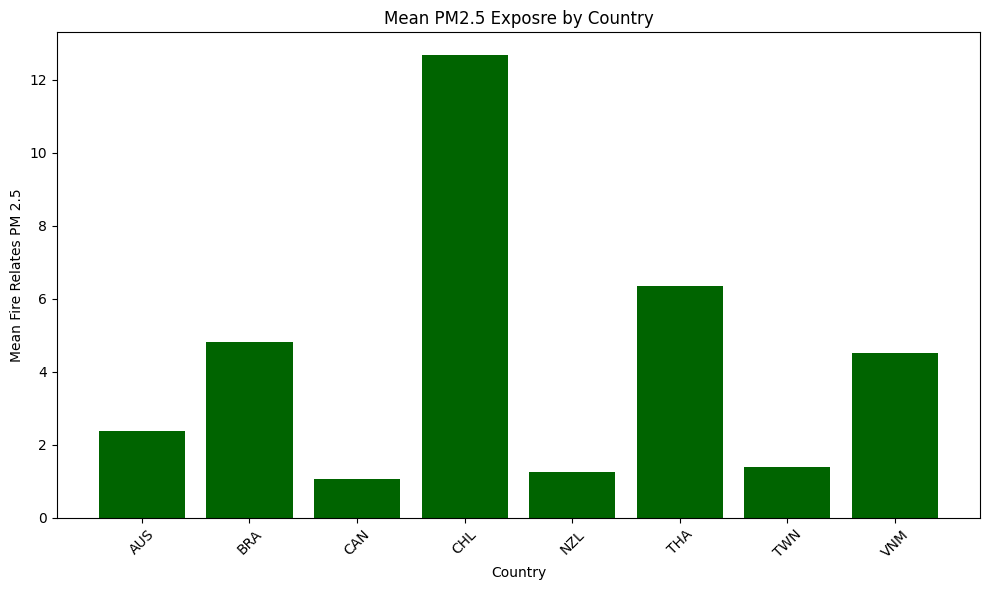

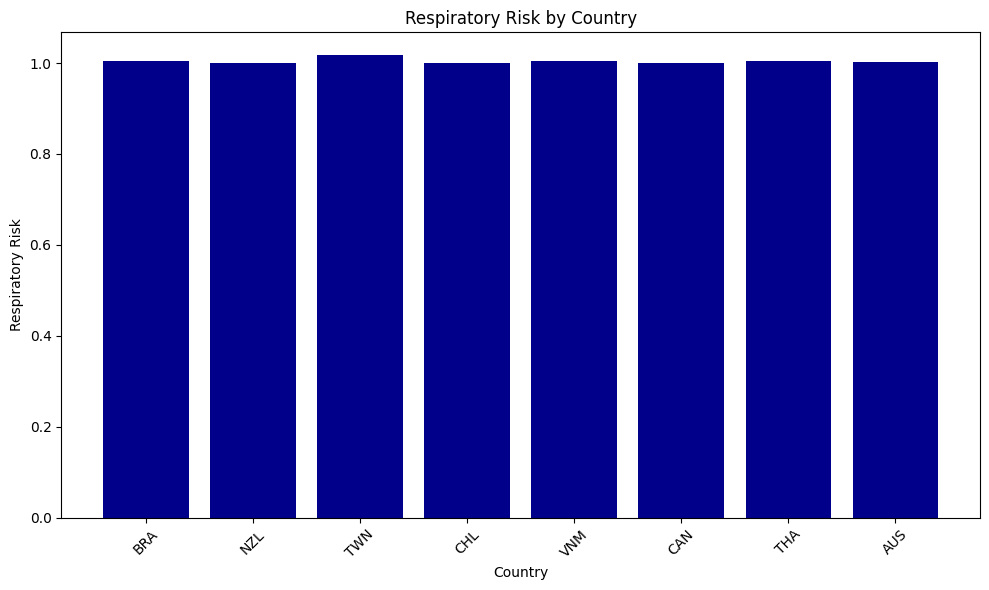

In [9]:
#Bar graphs for Respiratory risk and PM2.5 abundance per country
#mean PM2.5 abundance by country
import matplotlib.pyplot as plt
countries = data.iloc[:,0].astype(str).str.strip()
plt.figure(figsize=(10,6))
plt.bar(meanbycountry.index, meanbycountry.values, color="#006400")
plt.xlabel("Country")
plt.ylabel("Mean Fire Relates PM 2.5")
plt.title("Mean PM2.5 Exposre by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mean_pm25_bargraph.png", dpi=300, bbox_inches='tight')
plt.show()

#Respiratory risk by country
plt.figure(figsize=(10,6))
plt.bar(countries, data.iloc[:,1], color='darkblue')
plt.xlabel("Country")
plt.ylabel("Respiratory Risk")
plt.title("Respiratory Risk by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("RR_bargraph.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
#Pearson and Spearman correlation coeficitents 
from scipy.stats import pearsonr, spearmanr
corrdata = data[["RR", "Mean per country"]].dropna()
pearsoncorr, pearsonP = pearsonr(corrdata["RR"], corrdata["Mean per country"])
spearmancorr, spearmanP = spearmanr(corrdata["RR"], corrdata["Mean per country"])
print(f"Pearson r = {pearsoncorr:.4f}, p = {pearsonP:.4g}")
print(f"Spearman p = {spearmancorr:.4f}, p = {spearmanP:.4g}")

Pearson r = -0.2777, p = 0.5054
Spearman p = 0.2530, p = 0.5454


In [5]:
#linear regression
from scipy.stats import linregress
corrdata = data[["RR", "Mean per country"]].dropna()
linres = linregress(x=corrdata["Mean per country"], y=corrdata["RR"])
print("Linear Regression of Respiratory Risk versus Fire Related PM2.5:")
print(f"Slope: {linres.slope:.4f}")
print(f"Intercept: {linres.intercept:.4f}")
print(f"R-squared: {linres.rvalue**2:.4f}")
print(f"p-value: {linres.pvalue:.4g}")
print(f"Standard Error: {linres.stderr:.4f}")

Linear Regression of Respiratory Risk versus Fire Related PM2.5:
Slope: -0.0004
Intercept: 1.0056
R-squared: 0.0771
p-value: 0.5054
Standard Error: 0.0005


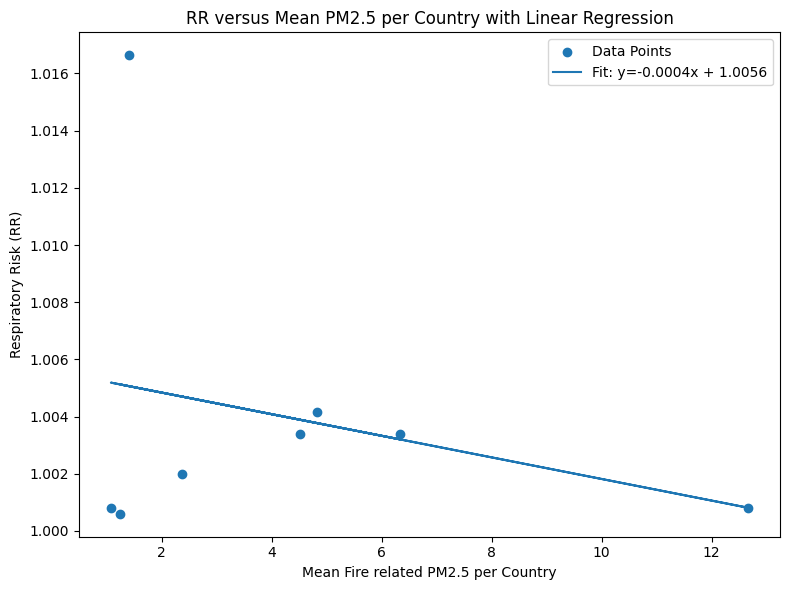

In [10]:
#Scatter plots
import matplotlib.pyplot as plt
from scipy.stats import linregress
corrdata = data[["RR", "Mean per country"]].dropna()
x=corrdata["Mean per country"]
y=corrdata["RR"]
reg = linregress(x,y) 
plt.figure(figsize=(8,6))
plt.scatter(x,y, label="Data Points")
plt.plot(x, reg.intercept + reg.slope * x, label=f"Fit: y={reg.slope:.4f}x + {reg.intercept:.4f}")
plt.xlabel("Mean Fire related PM2.5 per Country")
plt.ylabel("Respiratory Risk (RR)")
plt.title("RR versus Mean PM2.5 per Country with Linear Regression")
plt.legend()
plt.tight_layout()
plt.savefig("linregress.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
#Principle components analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
selecteddf = data.iloc[:, [1,4]].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(selecteddf.values)
pca = PCA()
scores = pca.fit_transform(X)
loadings = pca.components_
explained = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, ev in enumerate(explained, start=1):
    print(f"PC{i}: {ev:.4f}")


Explained Variance Ratio:
PC1: 0.6389
PC2: 0.3611


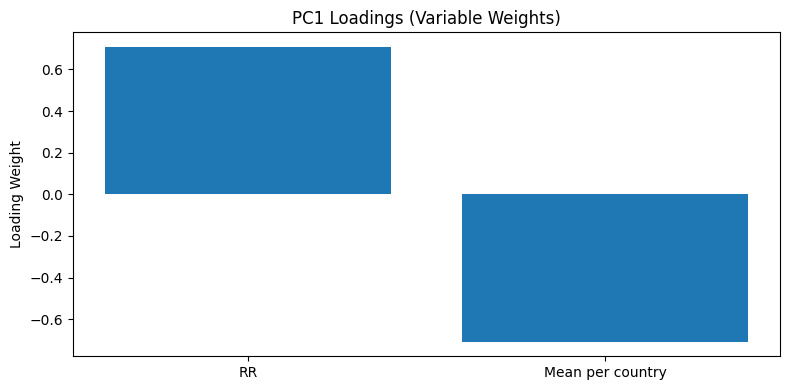

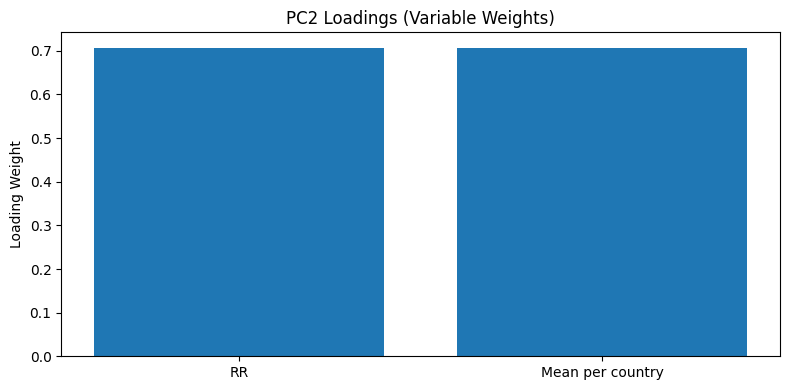

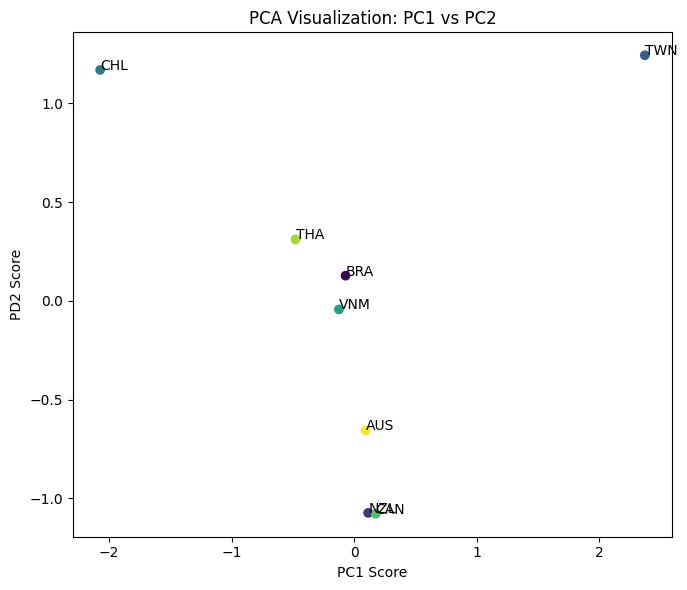

In [12]:
#bar chart of principle component weights
loaddf = pd.DataFrame(loadings.T, index=selecteddf.columns,columns=[f"PC{i+1}" for i in range(loadings.shape[0])])
for pc in loaddf.columns:
    plt.figure(figsize=(8,4))
    plt.bar(loaddf.index, loaddf[pc])
    plt.title(f"{pc} Loadings (Variable Weights)")
    plt.ylabel("Loading Weight")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"{pc}_loadings.png", dpi=300, bbox_inches='tight')
    plt.show()
    
#Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(scores[:,0], scores[:,1], c=pd.factorize(selecteddf.index)[0])
plt.xlabel("PC1 Score")
plt.ylabel("PD2 Score")
plt.title("PCA Visualization: PC1 vs PC2")
for idx, label in enumerate(data["Country"].iloc[selecteddf.index]):
    plt.annotate(label, (scores[idx,0],scores[idx,1]))

plt.tight_layout()
plt.savefig("PCompnents.png", dpi=300, bbox_inches='tight')
plt.show()